In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [4]:
df['segment'] = df.apply(lambda x: segment(x), axis=1)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segment
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Elderly


In [5]:
gb1 = df.groupby(['segment', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()

gb1

,segment,ProdTaken,CustomerID
0,Adult,0,3579
1,Adult,1,758
2,Elderly,0,341
3,Elderly,1,85
4,Teen,0,48
5,Teen,1,77


In [6]:
gb2 = df.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gb2

,segment,CustomerID
0,Adult,4337
1,Elderly,426
2,Teen,125


In [7]:
gb2 = df.groupby('segment').agg({'CustomerID':'nunique'}).reset_index()

gbm = gb1.merge(gb2 , how='inner', on='segment')

gbm.columns = ['segment', 'ProdTaken', 'Pelanggan Ditelfon','Total Pelanggan']

gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan
0,Adult,0,3579,4337
1,Adult,1,758,4337
2,Elderly,0,341,426
3,Elderly,1,85,426
4,Teen,0,48,125
5,Teen,1,77,125


In [8]:
gbm['Rasio'] = 100 * gbm['Pelanggan Ditelfon'] / gbm.groupby('Total Pelanggan')['Pelanggan Ditelfon'].transform('sum')
gbm

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
0,Adult,0,3579,4337,82.522481
1,Adult,1,758,4337,17.477519
2,Elderly,0,341,426,80.046948
3,Elderly,1,85,426,19.953052
4,Teen,0,48,125,38.400000
5,Teen,1,77,125,61.600000


In [9]:
result = gbm[(gbm['ProdTaken']==1)]
result

,segment,ProdTaken,Pelanggan Ditelfon,Total Pelanggan,Rasio
1,Adult,1,758,4337,17.477519
3,Elderly,1,85,426,19.953052
5,Teen,1,77,125,61.600000


<Figure size 1000x1500 with 0 Axes>

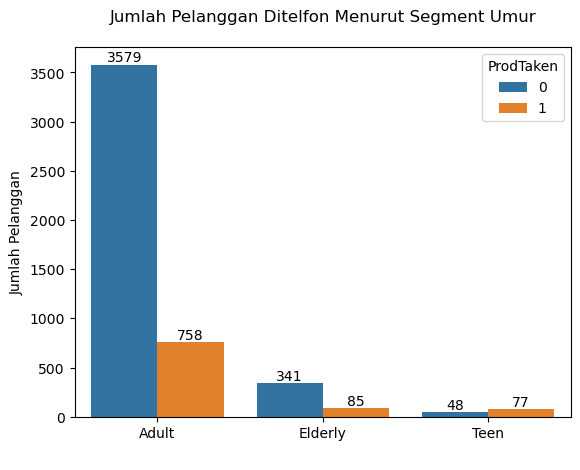

<Figure size 1000x1500 with 0 Axes>

In [10]:
ax = sns.barplot(y='Pelanggan Ditelfon', x='segment', data=gbm, hue='ProdTaken', errwidth=0)

ax.set(xlabel=' ', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Ditelfon Menurut Segment Umur\n')

for container in ax.containers:
    ax.bar_label(container)

plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

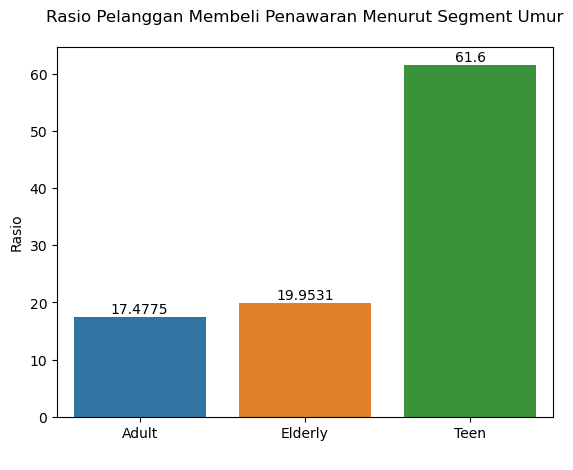

<Figure size 1000x1500 with 0 Axes>

In [11]:
ax2 = sns.barplot(y='Rasio', x='segment', data=result, errwidth=0)

ax2.set(xlabel=' ', ylabel='Rasio', title='Rasio Pelanggan Membeli Penawaran Menurut Segment Umur\n')

for container in ax2.containers:
    ax2.bar_label(container)

plt.figure(figsize=(10,15))

### Business Insights

Dari grafik diatas dapat dilihat bahwa mayoritas pelanggan yang diberikan tawaran dan membeli tawaran holiday package adalah pelanggan dewasa yang berumur 21 - 55 tahun, sedangkan yang diberikan tawaran paling sedikit adalah pelanggan remaja yang berumur dibawah 21 tahun. Namun dari segi efektifitas, datanya berkebalikan dimana sangat banyak pelanggan dewasa yang menolak tawaran dibandingkan menerima tawaran dilihat dari rasio pelanggan menerima tawaran yaitu senilai **17.47%**, sebaliknya pelanggan usia remaja memiliki rasio terima tawaran yang besar senilai **61.6%** yang berarti pelanggan remaja lebih banyak menerima tawaran dibanding menolak tawaran dari telfon yang telah dilakukan.

### Business Recommendations

Dari data diatas dilihat penawaran kepada pelanggan usia remaja memiliki rasio pembelian yang tinggi, maka disarankan kepada tim Marketing untuk menambah frekuensi penawaran kepada pelanggan usia remaja dan mengurangi frekuensi penawaran kepada pelanggan usia dewasa untuk meningkatkan efektifitas pemasaran untuk produk holiday package.